1.   Mohlatlego Nakeng
2.   Raymond Chiruka


# **Task**

>> In this notebook we validate microblogs users to detect bots in order to monitonir nonsensical activities.

In [ ]:
import numpy as np 
import pandas as pd
pd.set_option('display.max_columns', None)
# for visualisations 
import matplotlib.pyplot as plt
# for regular expressions
import re
# for handling strings 
import string
# for maths operations
import math
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('punkt')
nltk.download('wordnet')
stop_words=stopwords.words('english')
stemmer=PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/Shareddrives/MIT808 - group 6/data/Categories.csv") 

In [ ]:
df.head()

,statuses_text,statuses_retweeted,location_cat,tweets_location,message_creator
0,rt drericding breakingâsingleshot johnson amp ...,False,True,local,Human
1,rt bbcmorelle very good news on novavax vaccin...,False,True,local,Human
2,rt voxdotcom what makes the johnson amp johnso...,False,False,global,Human
3,rt drericding breakingâsingleshot johnson amp ...,False,True,local,Human
4,rt jsavagetweets johnson amp johnson aka janss...,False,True,local,Human


In [ ]:
df.shape

(404768, 5)

In [ ]:
df.drop(columns=['statuses_retweeted',
                 'location_cat',
                 'tweets_location'],inplace = True)


input_query

statuses_user_location
statuses_user_followers_count
statuses_user_friends_count
statuses_user_listed_count
statuses_user_favourites_count
statuses_retweeted_status_text
statuses_retweeted_status_user_followers_count
statuses_retweeted_status_user_friends_count
-
statuses_retweeted_status_user_favourites_count
statuses_retweeted_status_user_statuses_count
statuses_retweeted_status_retweet_count
statuses_retweeted_status_favorite_count
statuses_retweet_count
statuses_favorite_count
tatuses_lang

**Data extraction to indentify bots**


To create the binary variable of human or bot. I used the profile activity as proxy for classify bot or human. so I used 72 as a cutoff point where if average daily activity is more than 72 tweets then it is a susspected bot. 
(if you send 72 tweets in a 12 hour period thats about 6 tweets a  every hour) which is not normal human behaviour. using "statuses_user_created_at" which is the date the twitter account was created and "statuses_created_at" which is the date the enquiry was created. therefore 
'statuses_created_at' - 'statuses_user_created_at' = days_the_profile_in_use.
'statuses_user_statuses_count' this count of tweets sent since the account has been in use.
hence  'statuses_user_statuses_count'/'profile_in_use' gives you the activity per day.


In [ ]:
#This has been commented out since the dataset being used here has the human/bot category 
#convert twitter dates to datetypes 
#df['statuses_user_created_at']=pd.to_datetime(df['statuses_user_created_at']).dt.date
#df['statuses_created_at']=pd.to_datetime(df['statuses_created_at']).dt.date
# calculate the number of days the profile has been in use
#df['profile_in_use']=df['statuses_created_at']-df['statuses_user_created_at']
#df['profile_in_use']=pd.to_numeric(df['profile_in_use'].dt.days,downcast='integer')
#df['messages_per_day']=df['statuses_user_statuses_count']/df['profile_in_use']
#create variable in human or bot
#df['message_creator']=df['messages_per_day'].apply(lambda x: 'Bot' if x > 72 else 'Human' )

In [ ]:
df.head()

,statuses_text,message_creator
0,rt drericding breakingâsingleshot johnson amp ...,Human
1,rt bbcmorelle very good news on novavax vaccin...,Human
2,rt voxdotcom what makes the johnson amp johnso...,Human
3,rt drericding breakingâsingleshot johnson amp ...,Human
4,rt jsavagetweets johnson amp johnson aka janss...,Human


In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt  

In [ ]:
# remove twitter handles (@user)
df['statuses_text'] = np.vectorize(remove_pattern)(df['statuses_text'], "@[\w]*")
df['statuses_text'] = df['statuses_text'].str.replace("[^a-zA-Z]", " ")

In [ ]:
#make dataframe lowercase
df = df.applymap(lambda s:s.lower() if type(s) == str else s)

In [ ]:
df.head()

,statuses_text,message_creator
0,rt drericding breaking singleshot johnson amp ...,human
1,rt bbcmorelle very good news on novavax vaccin...,human
2,rt voxdotcom what makes the johnson amp johnso...,human
3,rt drericding breaking singleshot johnson amp ...,human
4,rt jsavagetweets johnson amp johnson aka janss...,human


In [ ]:
#df.drop(columns=['statuses_created_at',
#               'statuses_user_created_at',
#                'statuses_user_statuses_count',
#                'profile_in_use',
#                'messages_per_day'],inplace=True)

In [ ]:
df.head()

,statuses_text,message_creator
0,rt drericding breaking singleshot johnson amp ...,human
1,rt bbcmorelle very good news on novavax vaccin...,human
2,rt voxdotcom what makes the johnson amp johnso...,human
3,rt drericding breaking singleshot johnson amp ...,human
4,rt jsavagetweets johnson amp johnson aka janss...,human


In [ ]:
df.shape

(404768, 2)

In [ ]:
df.isnull().sum()

statuses_text      0
message_creator    0
dtype: int64

In [ ]:
length = []
[length.append(len(str(text))) for text in df['statuses_text']]
df['length'] = length
df.head()

,statuses_text,message_creator,length
0,rt drericding breaking singleshot johnson amp ...,human,137
1,rt bbcmorelle very good news on novavax vaccin...,human,126
2,rt voxdotcom what makes the johnson amp johnso...,human,135
3,rt drericding breaking singleshot johnson amp ...,human,137
4,rt jsavagetweets johnson amp johnson aka janss...,human,134


The histogram below visualize the human vs bots usage. Statistical our is imbalanced ,we might experience overfitting.

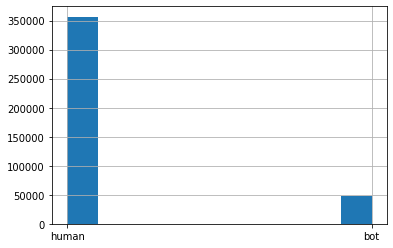

In [ ]:
df.message_creator.hist()

In [ ]:
df['Label'] = df['message_creator'].apply(lambda x: 1 if x=='human' else 0)

In [ ]:
df.head()

,statuses_text,message_creator,length,Label
0,rt drericding breaking singleshot johnson amp ...,human,137,1
1,rt bbcmorelle very good news on novavax vaccin...,human,126,1
2,rt voxdotcom what makes the johnson amp johnso...,human,135,1
3,rt drericding breaking singleshot johnson amp ...,human,137,1
4,rt jsavagetweets johnson amp johnson aka janss...,human,134,1


In [ ]:
from sklearn.model_selection import train_test_split # we sample our data by using data split
df_train = df.sample(frac=0.8, random_state=200)
df_train, df_test = train_test_split(df, test_size=0.2)
df_train

,statuses_text,message_creator,length,Label
126376,rt business pfizer and biontechs vaccine stimu...,human,136,1
274025,alabama official on vaccine rollout how can th...,human,125,1
159224,rt chomilomd today s mn covidvaccine announcem...,human,138,1
167792,the us fda says the johnson amp johnson covidv...,human,127,1
399914,rt firstgentleman i am very happy that i have ...,human,138,1
...,...,...,...,...
54944,rt piyushgoyaloffc along with south africa we ...,human,136,1
124996,rt nymag eradicating the novel coronavirus may...,human,136,1
336840,feeling pretty ill after my vaccine but i am h...,human,65,1
336463,rt honestyandhumor covid vaccine deaths of aus...,human,115,1


In [ ]:
# here we are importing nltk,stopwords and porterstemmer we are using stemming on the text 
# we have and stopwords will help in removing the stopwords in the text

#re is regular expressions used for identifying only words in the text and ignoring anything else
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
# importing neural network libraries
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Embedding,LSTM,Dropout
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.linear_model import LogisticRegression

In [ ]:
# here we are setting vocabulary size
voc_size=5000

In [ ]:
x = df_train.drop('Label',axis = 1)
y = df_train['Label']

In [ ]:
messages = x.copy()
##Since we drop Null values from our Dataset ,so we need to Reset Index of our Dataset
messages.reset_index(inplace=True)

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
print(stopwords)

<WordListCorpusReader in '/root/nltk_data/corpora/stopwords'>


In [ ]:
ps = PorterStemmer()
corpus = []
for i in range(0,len(messages)):
    result = re.sub('[^a-zA-Z]',' ',messages['statuses_text'][i])  
    result = result.lower()
    result = result.split()
    
    result = [ps.stem(word) for word in result if not word in stopwords.words("english")]
    result = " ".join(result)
    corpus.append(result)

In [ ]:
onehot_repr = [one_hot(words,voc_size) for words in corpus]

In [ ]:
sent_length = 20
embeded_docs = pad_sequences(onehot_repr,padding= 'pre',maxlen = sent_length)

In [ ]:
embedding_vector_features = 40
model = Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length = sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer = 'adam',loss ='binary_crossentropy',metrics=['accuracy'])

In [ ]:
x_final = np.array(embeded_docs)
y_final = np.array(y)
x_train,x_val,y_train,y_val = train_test_split(x_final,y_final,test_size=0.33,random_state=42)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            200000    
_________________________________________________________________
dropout (Dropout)            (None, 20, 40)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def plot_learning_curve(history,epochs):
    #Accuracy
    epoch_range = range(1,epochs+1)
    plt.plot(epoch_range,history.history['accuracy'])
    plt.plot(epoch_range,history.history["val_accuracy"])
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(["Train","Val"],loc ="upper left")
    plt.show()

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

Epoch 1/20
3390/3390 [==============================] - 117s 34ms/step - loss: 0.3547 - accuracy: 0.8808 - val_loss: 0.3455 - val_accuracy: 0.8819
Epoch 2/20
3390/3390 [==============================] - 114s 34ms/step - loss: 0.3401 - accuracy: 0.8812 - val_loss: 0.3436 - val_accuracy: 0.8823
Epoch 3/20
3390/3390 [==============================] - 111s 33ms/step - loss: 0.3332 - accuracy: 0.8817 - val_loss: 0.3483 - val_accuracy: 0.8821
Epoch 4/20
3390/3390 [==============================] - 110s 32ms/step - loss: 0.3273 - accuracy: 0.8825 - val_loss: 0.3455 - val_accuracy: 0.8819
Epoch 5/20
3390/3390 [==============================] - 109s 32ms/step - loss: 0.3227 - accuracy: 0.8833 - val_loss: 0.3498 - val_accuracy: 0.8801
Epoch 6/20
3390/3390 [==============================] - 109s 32ms/step - loss: 0.3187 - accuracy: 0.8844 - val_loss: 0.3515 - val_accuracy: 0.8803
Epoch 7/20
3390/3390 [==============================] - 110s 33ms/step - loss: 0.3150 - accuracy: 0.8853 - val_loss: 0

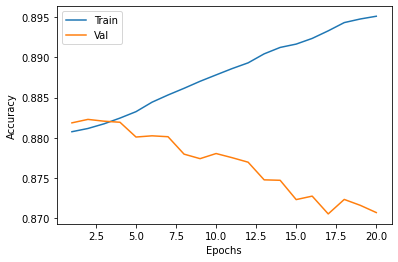

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff3fbddb050>)

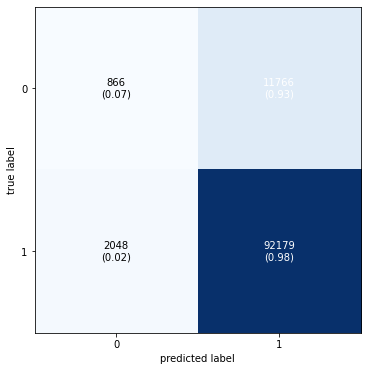

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=20,
                    verbose=True,
                    validation_data=(x_val, y_val),
                    batch_size=64)
loss, accuracy = model.evaluate(x_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_val, y_val, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_learning_curve(history,20)
y_pred = model.predict_classes(x_val)
mat = confusion_matrix(y_val,y_pred)
plot_confusion_matrix(mat,figsize=(6,6),show_normed=True)

From the confusion matrix , we can see that our data was overfitted. 

In [ ]:
#############################
# logistic regresssion

In [ ]:
classifier = LogisticRegression()
classifier.fit(x_train, y_train)
score = classifier.score(x_val, y_val)
print("Accuracy:", score)

Accuracy: 0.8817881507406957


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff3f7f89710>)

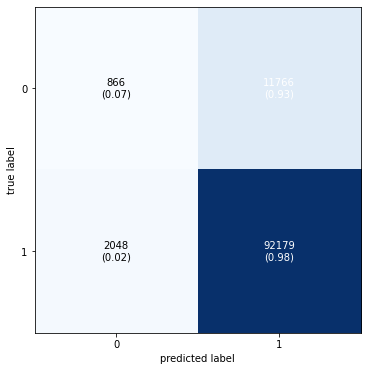

In [ ]:
y_pred = model.predict_classes(x_val)
mat = confusion_matrix(y_val,y_pred)
plot_confusion_matrix(mat,figsize=(6,6),show_normed=True)

In [ ]:
# trying other models
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers 
maxlen = 100

x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
x_val = pad_sequences(x_val, padding='post', maxlen=maxlen)

In [ ]:
embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=voc_size,output_dim=embedding_dim, input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           250000    
_________________________________________________________________
flatten (Flatten)            (None, 5000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                50010     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 300,021
Trainable params: 300,021
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
3390/3390 [==============================] - 34s 10ms/step - loss: 0.3509 - accuracy: 0.8808 - val_loss: 0.3442 - val_accuracy: 0.8818
Epoch 2/20
3390/3390 [==============================] - 35s 10ms/step - loss: 0.3312 - accuracy: 0.8808 - val_loss: 0.3452 - val_accuracy: 0.8818
Epoch 3/20
3390/3390 [==============================] - 34s 10ms/step - loss: 0.3169 - accuracy: 0.8809 - val_loss: 0.3511 - val_accuracy: 0.8818
Epoch 4/20
3390/3390 [==============================] - 34s 10ms/step - loss: 0.3046 - accuracy: 0.8835 - val_loss: 0.3615 - val_accuracy: 0.8799
Epoch 5/20
3390/3390 [==============================] - 33s 10ms/step - loss: 0.2937 - accuracy: 0.8882 - val_loss: 0.3767 - val_accuracy: 0.8754
Epoch 6/20
3390/3390 [==============================] - 35s 10ms/step - loss: 0.2820 - accuracy: 0.8940 - val_loss: 0.3946 - val_accuracy: 0.8713
Epoch 7/20
3390/3390 [==============================] - 34s 10ms/step - loss: 0.2723 - accuracy: 0.8985 - val_loss: 0.4230 -

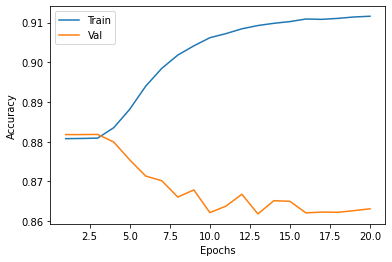

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff3f74b3610>)

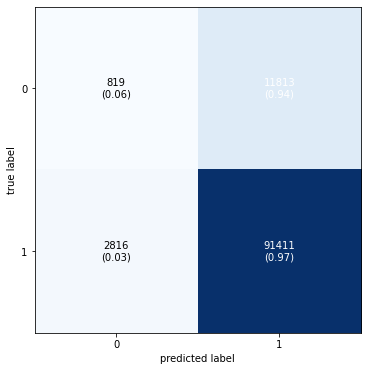

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=20,
                    verbose=True,
                    validation_data=(x_val, y_val),
                    batch_size=64)
loss, accuracy = model.evaluate(x_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_val, y_val, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_learning_curve(history,20)
y_pred = model.predict_classes(x_val)
mat = confusion_matrix(y_val,y_pred)
plot_confusion_matrix(mat,figsize=(6,6),show_normed=True)

In [ ]:
embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=voc_size,output_dim=embedding_dim,input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 50)           250000    
_________________________________________________________________
global_max_pooling1d (Global (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 250,521
Trainable params: 250,521
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
3390/3390 [==============================] - 29s 8ms/step - loss: 0.3600 - accuracy: 0.8808 - val_loss: 0.3448 - val_accuracy: 0.8818
Epoch 2/20
3390/3390 [==============================] - 30s 9ms/step - loss: 0.3374 - accuracy: 0.8809 - val_loss: 0.3441 - val_accuracy: 0.8819
Epoch 3/20
3390/3390 [==============================] - 27s 8ms/step - loss: 0.3287 - accuracy: 0.8813 - val_loss: 0.3457 - val_accuracy: 0.8825
Epoch 4/20
3390/3390 [==============================] - 28s 8ms/step - loss: 0.3218 - accuracy: 0.8820 - val_loss: 0.3467 - val_accuracy: 0.8823
Epoch 5/20
3390/3390 [==============================] - 27s 8ms/step - loss: 0.3153 - accuracy: 0.8830 - val_loss: 0.3505 - val_accuracy: 0.8818
Epoch 6/20
3390/3390 [==============================] - 24s 7ms/step - loss: 0.3088 - accuracy: 0.8849 - val_loss: 0.3573 - val_accuracy: 0.8792
Epoch 7/20
3390/3390 [==============================] - 28s 8ms/step - loss: 0.3018 - accuracy: 0.8866 - val_loss: 0.3641 - val_ac

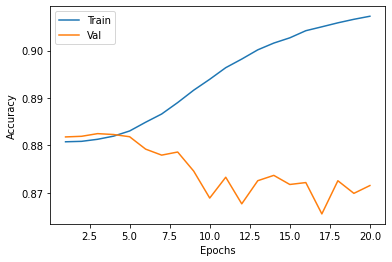

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff3f71e5690>)

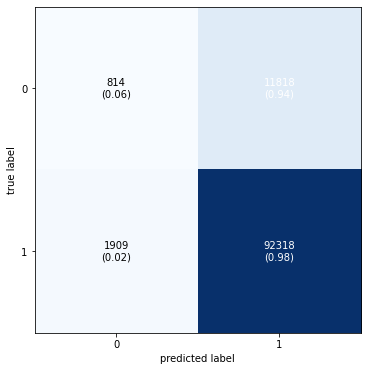

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=20,
                    verbose=True,
                    validation_data=(x_val, y_val),
                    batch_size=64)
loss, accuracy = model.evaluate(x_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_val, y_val, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_learning_curve(history,20)
y_pred = model.predict_classes(x_val)
mat = confusion_matrix(y_val,y_pred)
plot_confusion_matrix(mat,figsize=(6,6),show_normed=True)
